# Bad habits vs Education
This guided project explores whether there is a connection between the student population and "bad" habits or behaviors that may negatively impact health. The habits under study are:
- Coffee addiction
- Smoking
- Video game addiction

It is important to note that, due to a lack of recent research and available data on these topics, the data sources used in this project range from 2019 to 2020.

#### Slideshow controls:
*Press the `'↓'` key* when available on the bottom-right side of your screen. 

*Press the `'→'` key* When `'↓'` is not available.

In [148]:
import pandas as pd #For reading and handling CSV files.
import numpy as np  # For numerical operations and handling missing values.
import matplotlib.pyplot as plt  # For creating basic visualizations.
import seaborn as sns  # For advanced data visualization used in the infographic.
from IPython.display import Image, display, clear_output, HTML # Used to display images not generated in this notebook
from tabulate import tabulate # This beauty lets us create smooth table style outputs in terminal
import ipywidgets as widgets # This great tool lets use code into our notebook to make quick displays and customizations

## Content:
1. Introduction.
2. Load Data.
3. Visualization Plan.
4. Loading & Cleaning Data

Also feel free to visit **https://github.com/DefoNotGus/DV_assesment** To find the project's notebook

### Is there a relationship between habits and education? 

By examining the demographic factors associated with these habits and their prevalence in different cultures, the project aims to uncover potential links between these behaviors and the student population. Such insights could help society understand whether these harmful or misused habits are directly related to the stress faced by higher education students, highlighting the need to restructure education programs in regions where these addictions are more prevalent.

<div style="text-align: center;">
  <img src="img/img1.png" alt="Image" style="width:300px;">
</div>

# Data Description.

## The datasets used to study the habits are:

1. **Coffee Consumption Dataset**: Lists coffee consumption by country with extensive coverage.
- **Source**: [Kaggle](https://www.kaggle.com/datasets/nurielreuven/coffee-consumption-by-country-2022/data) 
- **Size**: 182 rows and 3 columns
- **Domain**: Healthcare and Marketing
2. **Smoking Rates Dataset**: Provides a chronological overview of smoking rates in many countries, sourced via a Google search.
- **Source**: [World Population Review](https://worldpopulationreview.com/country-rankings/smoking-rates-by-country)  
- **Size**: 164 rows and 10 columns
- **Domain**: Healthcare
3. **Gamers Market Dataset**: Compiles 2019 gaming market overview in many countries, offering chronological alignment with the other datasets. Data Scraping  techniques used.
- **Source**: [Allcorrect Games](https://allcorrectgames.com/insights/a-global-research-of-2019-games-market/)  
- **Size**: 29 rows and 8 columns
- **Domain**: Marketing and Videogames

## The datasets used to analyze students and enrollment data are:  

1. **Education Statistics Dataset**: A massive dataset with student enrollment data by region, sourced using the World Bank DataBank tool.  
- **Source**: [World Bank](https://databank.worldbank.org/indicator/)  
- **Size**: 197235 rows and 8 columns
- **Domain**: Education
2. **Students Dataset**: Provides country-specific enrollment data filtered to align with the habits datasets, sourced from the OECD Data Explorer.  
- **Source**: [OECD Data Explorer](https://data-explorer.oecd.org/)  
- **Size**: 56 rows 26 columns
- **Domain**: Education

# Visualization Plan.

This project aims to generate a visual correlation between bad habits and education and analyze factors contributing to certain addictions using python as the tool for data handling. The approach involves, exploring and procesing data, Gathering the relevant data for visualization techniques. Creating an infographic that visually represents addiction patterns in relation to gender, geographic, and academic factors. Canva is the tool chosen for the design of the infographic and the draft.

## Key Variables:
- Country: Countries where the data was gathered, This will be our index for certain datasets.
- Coffee consumption per capita (2020): The amount of coffee divided by the population, basically the amount of coffee "per head" in Kilograms.
- Smokig Rates (2020): The porcentage of population that smokes of each country listed.  
- Smokig Rates (2020) Male: The porcentage of male population that smokes of each country listed.  
- Smokig Rates (2020)Female: The porcentage of female population that smokes of each country listed.  
- Gamers (2019): The number of gamers per country in millions.
- Students per region (2020): Number of enrolled students per region.
- Students per country (2020): Number of enrolled students per Country.

## Visualizations: 
Since the data to visualize is mainly comparative the plots to implement will be: 
- Bar charts
- Line graphs
- Column charts
- Heatmaps
- Pie chart
- Stack bar chart
- Area chart

## Accesibility, Accuracy and presentation:

This project will follow up the following considerations to provide accesibility and avoid missleading data:
- Use readable fonts and sufficient text size.
- Include legends and labels for clarity and provide alternative text for charts.
- Ensure colorblind-friendly palettes (Only one graph has red-greens contrast, but the legend is there to help and guide).
- Normalize data for fair comparisons.
- Avoid cherry-picking data
- Present outliers and anomalies transparently.
- Clarify causation vs. correlation to avoid misinterpretation.
- Make the data and the code open source to enable users to make their own visualizations and research.
- Present a neat and clear format for the infographic like shown below:
 

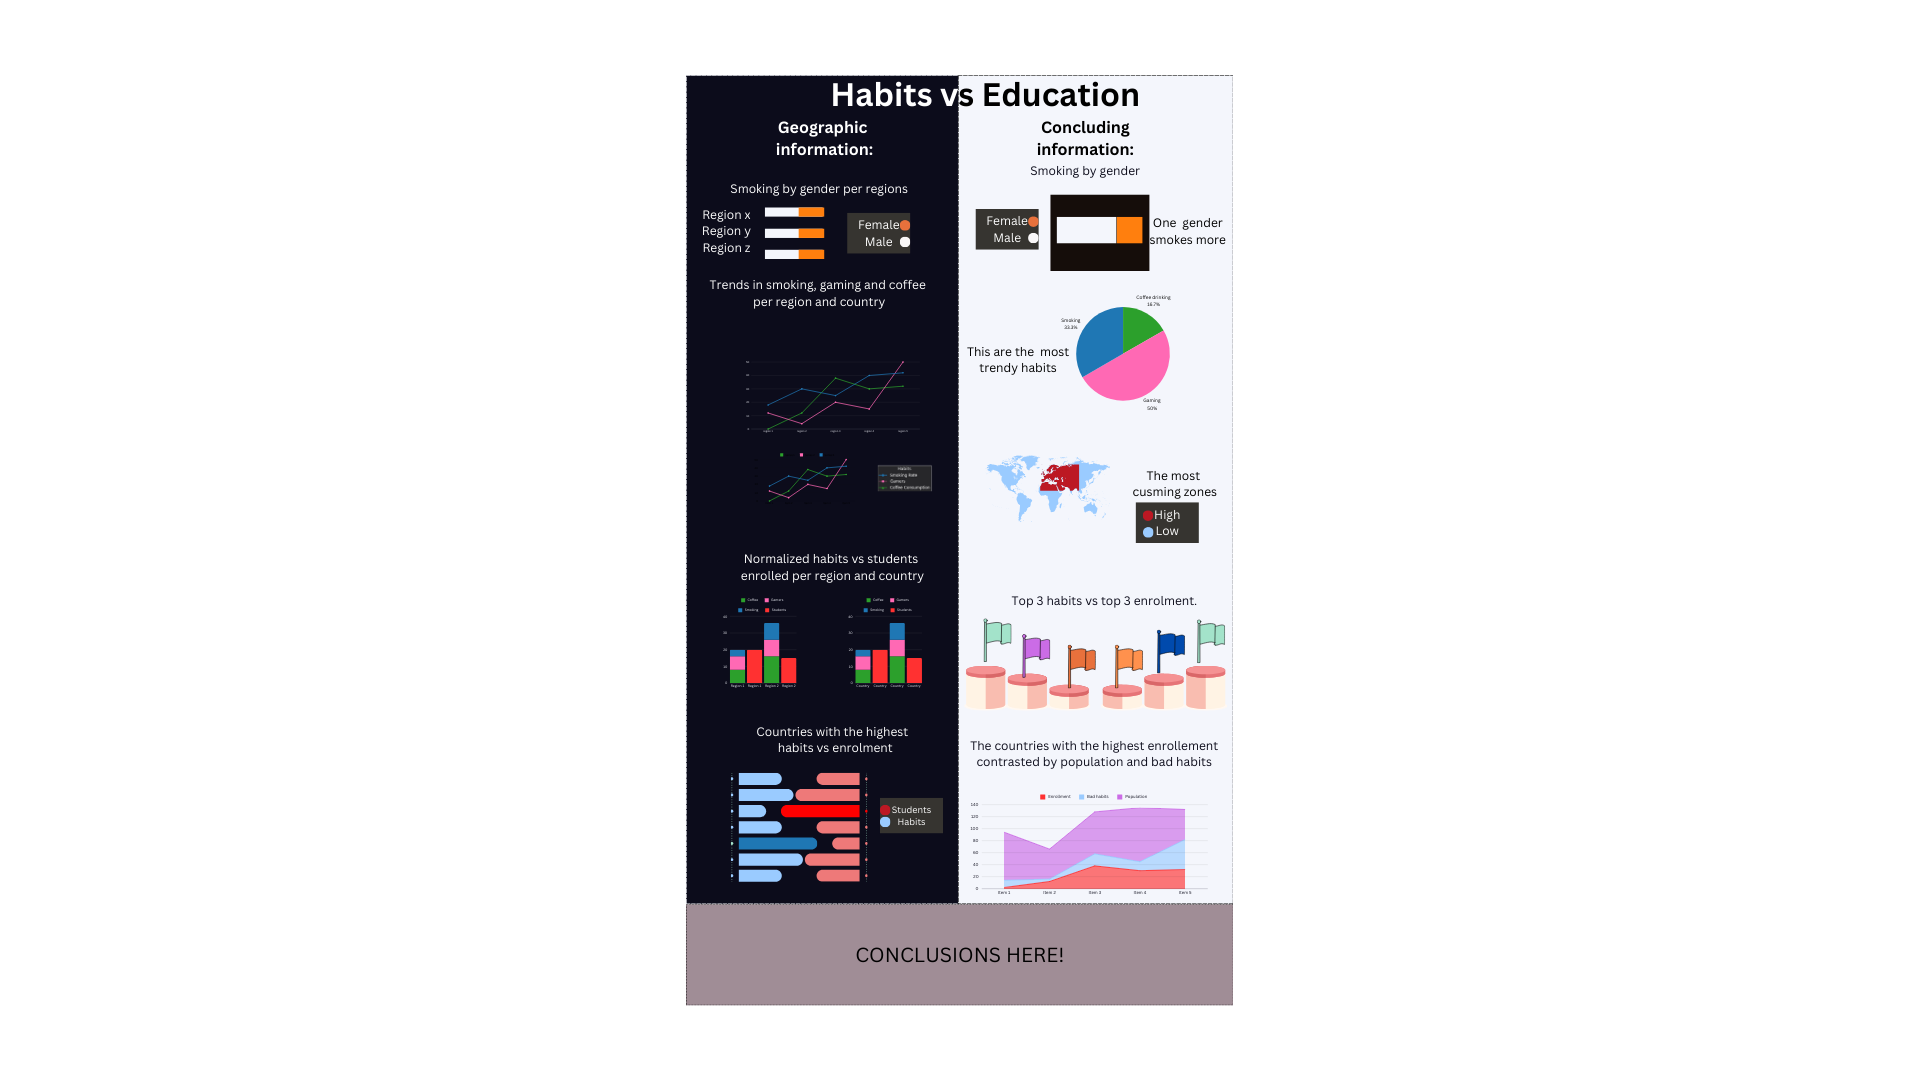

In [149]:
display(Image(filename='img/Draft.png'))

# Data Loading and Cleaning.

Datasets are loaded into variables using `pd.read_csv()` from the Pandas library.

In [150]:
# Importing the CSV files
coffee_df = pd.read_csv('Datasets/coffee.csv')
smoking_df = pd.read_csv('Datasets/smoking.csv')
gamers_df = pd.read_csv('Datasets/gamers.csv')
edstats_df = pd.read_csv('Datasets/edstats.csv')
students_df = pd.read_csv('Datasets/students.csv')

## Display size and features.

Now we will display the size, features and data type of each dataframe using the methods `shape()` and `columns.tolist` and arranging them with `Tabulate` as shown below:

In [151]:
# Prepare data for each dataframe using a list of title, shape and features.
data = [
    ["Coffee DataFrame", coffee_df.shape[0], coffee_df.shape[1], ", ".join(coffee_df.columns.tolist())],
    ["Smoking DataFrame", smoking_df.shape[0], smoking_df.shape[1], ", ".join(smoking_df.columns.tolist())],
    ["Gamers DataFrame", gamers_df.shape[0], gamers_df.shape[1], ", ".join(gamers_df.columns.tolist())],
    ["Students Enrollment DataFrame", edstats_df.shape[0], edstats_df.shape[1], ", ".join(edstats_df.columns.tolist())],
    ["Students Enrollment by Country DataFrame", students_df.shape[0], students_df.shape[1], ", ".join(students_df.columns.tolist())]
]
# Define the table headers
headers = ["DataFrame", "Rows", "Columns", "Features"]
# Generate HTML table using tabulate
table_html = tabulate(data, headers=headers, tablefmt="html")
# Wrap the table in a div to scale it down and enable scrolling
scaled_table_html = f'''
<div style=" max-height: 400px; overflow: auto;">
    {table_html}
</div>
'''

In [152]:
# Display the scaled and scrollable HTML table
HTML(scaled_table_html)

DataFrame,Rows,Columns,Features
Coffee DataFrame,182,3,"country, coffeeConsumptionByCountry_perCapitaCons2020, coffeeConsumptionByCountry_perCapitaCons2016"
Smoking DataFrame,164,10,"country, smokingRatesByCountry_rateBothPct2022, smokingRatesByCountry_rateMalePct2022, smokingRatesByCountry_rateFemalePct2022, smokingRatesByCountry_rateBothPct2021, smokingRatesByCountry_rateMalePct2021, smokingRatesByCountry_rateFemalePct2021, smokingRatesByCountry_rateBothPct2020, smokingRatesByCountry_rateMalePct2020, smokingRatesByCountry_rateFemalePct2020"
Gamers DataFrame,29,8,"№, Country, Games Market Revenue (mln USD), Internet Penetration (%), Number of Gamers (millions), Mobile Market (mln USD), Average Yearly Spending on Mobile Games (USD), EF EPI (English Proficiency Index)"
Students Enrollment DataFrame,197235,8,"Series, Series Code, Country Name, Country Code, 2019 [YR2019], 2020 [YR2020], 2021 [YR2021], 2022 [YR2022]"
Students Enrollment by Country DataFrame,52,26,"STRUCTURE, STRUCTURE_ID, STRUCTURE_NAME, ACTION, LOCATION, Country, INDICATOR, Indicator, SUBJECT, Subject, MEASURE, Measure, FREQUENCY, Frequency, TIME_PERIOD, Time, OBS_VALUE, Observation Value, OBS_STATUS, Observation Status, UNIT_MEASURE, Unit of Measures, UNIT_MULT, Multiplier, BASE_PER, Base reference period"


# Peeking in Our Data

Using `ipywidgets`(library), `Tabulate`, `.head()` and `tail()` (`Pandas` functions) we will display a small version of how every table looks like for error handling purposes.
> `ipywidgets` Only available in Jupyter Notebook version

In [153]:

descriptions = {
    "coffee": "This dataset lists 183 countries' coffee consumption per capita (in kg) for 2020 and 2016, highlighting high-consumption countries.",
    "smoking": "This dataset shows smoking rates by gender in 164 countries (2020–2022), enabling comparisons by country and gender.",
    "gamers": "This dataset covers 29 countries, including gaming revenue, internet penetration, gamer count, mobile market stats, and English proficiency, making it ideal for analyzing gamers by country.",
    "edstats": "This dataset contains extensive data collected per series, not just by country. For this project, we'll focus on analyzing higher education populations by filtering the relevant series.",
    "students": "This dataset shows specific information gathered from a list of selected countries in other datasets. it shows the students enrolment data per level (primary, secundary, terciary and total)."
}

# Create the Output widget to display the dataframes and descriptions
output = widgets.Output(
    layout=widgets.Layout(
        max_height="400px", overflow="auto"  # Enables both vertical and horizontal scrolling
    )
)

# Create text input widgets for the user to specify head and tail rows
head_input = widgets.IntText(value=5, description='Head Rows:', min=1)
tail_input = widgets.IntText(value=5, description='Tail Rows:', min=1)

# Function to display head, tail, and description of the dataframe based on user input
def display_head_tail(df, description, head_rows, tail_rows):
    with output:
        clear_output(wait=True)  # Clears previous output
        # Display the description as HTML
        display(widgets.HTML(f"<b>{description}</b><br>"))  # Display the description
        # Convert the dataframe to HTML and display it
        display(HTML(df.head(head_rows).to_html()))
        display(HTML(df.tail(tail_rows).to_html()))

# Create the buttons
coffee_button = widgets.Button(description="Coffee Data")
smoking_button = widgets.Button(description="Smoking Data")
gamers_button = widgets.Button(description="Gamers Data")
edstats_button = widgets.Button(description="Education Stats")
students_button = widgets.Button(description="Students Data")

# Function to handle button clicks
def on_button_click(button):
    # Get the values from the head and tail inputs
    head_rows = head_input.value
    tail_rows = tail_input.value
    
    if button == coffee_button:
        display_head_tail(coffee_df, descriptions["coffee"], head_rows, tail_rows)
    elif button == smoking_button:
        display_head_tail(smoking_df, descriptions["smoking"], head_rows, tail_rows)
    elif button == gamers_button:
        display_head_tail(gamers_df, descriptions["gamers"], head_rows, tail_rows)
    elif button == edstats_button:
        display_head_tail(edstats_df, descriptions["edstats"], head_rows, tail_rows)
    elif button == students_button:
        display_head_tail(students_df, descriptions["students"], head_rows, tail_rows)

# Attach the function to each button
coffee_button.on_click(on_button_click)
smoking_button.on_click(on_button_click)
gamers_button.on_click(on_button_click)
edstats_button.on_click(on_button_click)
students_button.on_click(on_button_click)

# Layout for horizontal alignment of buttons
buttons = widgets.HBox([coffee_button, smoking_button, gamers_button, edstats_button, students_button])
# Display the input widgets, buttons, and the output area
display(widgets.VBox([widgets.HBox([head_input, tail_input]), buttons, output]))

> `IGNORE CODE BELOW`  
> Code for HTML version. 

In [154]:
#Function to gather an specific amount of tail and head from a dataframe
def display_df_head_tail(df, num_rows=5):
    # Get the head and tail of the DataFrame
    head = df.head(num_rows).to_html(classes='table table-bordered table-striped')
    tail = df.tail(num_rows).to_html(classes='table table-bordered table-striped')
# Combine head and tail into a single HTML output with styled scrolling container
    return f'''
    <style>
        .scrollable {{
            max-height: 250px;
            overflow: auto;
        }}
    </style>
    <h4>First {num_rows} rows (Head) of the selected DataFrame</h4>
    <div class="scrollable">
        {head}
    </div>
    <h4>Last {num_rows} rows (Tail) of the selected DataFrame</h4>
    <div class="scrollable">
        {tail}
    </div>
    '''

In [155]:
#Coffee
display(HTML(display_df_head_tail(coffee_df)))

,country,coffeeConsumptionByCountry_perCapitaCons2020,coffeeConsumptionByCountry_perCapitaCons2016
0,Albania,4.51,NaN
1,Algeria,0.97,NaN
2,Angola,0.33,NaN
3,Antigua and Barbuda,6.07,NaN
4,Argentina,2.32,NaN
,country,coffeeConsumptionByCountry_perCapitaCons2020,coffeeConsumptionByCountry_perCapitaCons2016
177,Venezuela,1.86,NaN
178,Vietnam,5.77,NaN
179,Yemen,0.59,NaN
180,Zambia,0.09,NaN


### coffee_df
- Default numeric index
- 2020 Data: is a float type, ranges from 0.09 - 6.07.
- 2016 Data: Lots of NaN (Not a Number) which means the Dataframe may have issues with that column. Either way we will drop that column as we only need 2020 

In [156]:
#smoking
display(HTML(display_df_head_tail(smoking_df)))

,country,smokingRatesByCountry_rateBothPct2022,smokingRatesByCountry_rateMalePct2022,smokingRatesByCountry_rateFemalePct2022,smokingRatesByCountry_rateBothPct2021,smokingRatesByCountry_rateMalePct2021,smokingRatesByCountry_rateFemalePct2021,smokingRatesByCountry_rateBothPct2020,smokingRatesByCountry_rateMalePct2020,smokingRatesByCountry_rateFemalePct2020
0,India,24.3,37.8,10.8,25.2,38.8,11.5,26.1,40.0,12.2
1,China,23.4,45.1,1.6,23.4,45.2,1.6,23.7,45.6,1.7
2,United States,24.3,29.9,18.7,24.7,30.4,18.9,24.9,30.6,19.3
3,Indonesia,38.2,73.1,3.3,37.9,72.4,3.4,37.8,72.1,3.6
4,Pakistan,18.9,30.8,7.0,19.5,31.7,7.3,20.2,32.8,7.7
,country,smokingRatesByCountry_rateBothPct2022,smokingRatesByCountry_rateMalePct2022,smokingRatesByCountry_rateFemalePct2022,smokingRatesByCountry_rateBothPct2021,smokingRatesByCountry_rateMalePct2021,smokingRatesByCountry_rateFemalePct2021,smokingRatesByCountry_rateBothPct2020,smokingRatesByCountry_rateMalePct2020,smokingRatesByCountry_rateFemalePct2020
159,Marshall Islands,29.8,51.2,8.5,29.7,51.0,8.5,29.6,50.7,8.6
160,Palau,17.3,27.1,7.6,17.7,27.6,7.8,18.0,27.9,8.0
161,Cook Islands,27.0,31.8,22.2,27.4,32.3,22.6,27.9,32.9,23.0
162,Nauru,48.3,48.6,48.1,48.9,49.0,48.7,49.4,49.2,49.5


### smoking_df
- Default numeric index
- All the columns (except country) seem to be in float type. 
- Does not appear to have either missing or invalid data 

In [157]:
# Gamers
display(HTML(display_df_head_tail(gamers_df)))

,№,Country,Games Market Revenue (mln USD),Internet Penetration (%),Number of Gamers (millions),Mobile Market (mln USD),Average Yearly Spending on Mobile Games (USD),EF EPI (English Proficiency Index)
0,1,China,"36,540",59.30%,640,"21,140",14.69,53.44 (Moderate)
1,2,United States,"36,500",86.50%,215.15,"9,937",30.02,100.00 (Native)
2,3,Japan,"18,683",93.20%,79.6,"6,528.40",51.65,51.51 (Low)
3,4,South Korea,"6,194",86.50%,41.9,"5,810",113.48,55.04 (Moderate)
4,5,Germany,"6,000",94.50%,58.59,606.3,7.24,63.77 (Very High)
,№,Country,Games Market Revenue (mln USD),Internet Penetration (%),Number of Gamers (millions),Mobile Market (mln USD),Average Yearly Spending on Mobile Games (USD),EF EPI (English Proficiency Index)
24,25,Iran,458,80.50%,30,198,2.36,48.69 (Low)
25,26,United Arab Emirates,342,99%,7.84,78.7,8.03,48.19 (Very Low)
26,27,Singapore,319,84%,4.8,52,8.97,66.82 (Very High)
27,28,South Africa,224.58,67.70%,50.9,43.6,0.74,65.38 (Very High)


### gamers_df
- Default numeric index
- A "№" column that is meant to be an index
- Most data is string although it has numbers within.
- Does not appear to have either missing or invalid data 

In [158]:
# Education Stats
display(HTML(display_df_head_tail(edstats_df)))

,Series,Series Code,Country Name,Country Code,2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,"Labor force with advanced education, male (% of male labor force)",SL.TLF.ADVN.MA.ZS,Afghanistan,AFG,..,..,..,..
1,"Labor force with advanced education, male (% of male labor force)",SL.TLF.ADVN.MA.ZS,Albania,ALB,..,..,..,..
2,"Labor force with advanced education, male (% of male labor force)",SL.TLF.ADVN.MA.ZS,Algeria,DZA,..,..,..,..
3,"Labor force with advanced education, male (% of male labor force)",SL.TLF.ADVN.MA.ZS,American Samoa,ASM,..,..,..,..
4,"Labor force with advanced education, male (% of male labor force)",SL.TLF.ADVN.MA.ZS,Andorra,AND,..,..,..,..
,Series,Series Code,Country Name,Country Code,2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
197230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197233,Data from database: Education Statistics - All Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### edstats_df

- Huge DataFrame
- Lots of NaN (probaby corrupted or wrong data)
- The information will have to be filter by series as each series happens to have countries data.
- Lots of ".."  (empty data)

In [159]:
# Education Stats
display(HTML(display_df_head_tail(students_df)))

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME_PERIOD,Time,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,FRA,France,STUDENT,Number of students,TRY,Tertiary,IDX2015,2015=100,A,Annual,2020,NaN,113.34500,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,DEU,Germany,STUDENT,Number of students,PRY,Primary,IDX2015,2015=100,A,Annual,2020,NaN,104.62360,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,ITA,Italy,STUDENT,Number of students,PRY_NTRY,Primary to post-secondary non-tertiary,IDX2015,2015=100,A,Annual,2020,NaN,98.49902,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,KOR,Korea,STUDENT,Number of students,PRY_NTRY,Primary to post-secondary non-tertiary,IDX2015,2015=100,A,Annual,2020,NaN,87.87145,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,ESP,Spain,STUDENT,Number of students,ALLLEVEL,All levels,IDX2015,2015=100,A,Annual,2020,NaN,104.24360,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME_PERIOD,Time,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
47,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,GBR,United Kingdom,STUDENT,Number of students,ALLLEVEL,All levels,IDX2015,2015=100,A,Annual,2020,NaN,99.19232,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,GBR,United Kingdom,STUDENT,Number of students,PRY,Primary,IDX2015,2015=100,A,Annual,2020,NaN,104.34020,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,GBR,United Kingdom,STUDENT,Number of students,TRY,Tertiary,IDX2015,2015=100,A,Annual,2020,NaN,115.78140,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,DATAFLOW,OECD:DF_DP_LIVE(1.0),OECD Data Archive,I,IND,India,STUDENT,Number of students,TRY,Tertiary,IDX2015,2015=100,A,Annual,2020,NaN,113.34730,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### students_df:
- Too many features, Some are irrelevant for visualization (e.g. "STRUCTURE" and "STRUCTURE_ID").
- Two Subject columns "SUBJECT" and "Subject" 
- Lots of NaN, But luckily its mostly on irrelevant features

# Processing Data:

We will progresively remove or handle missing values, correcting or convert data types accurately, filtering out unnecessary rows or columns, transforming data by normalizing, scaling, or aggregating to ensure consistency and usability.

**Coffee_df:**

Now to process this dataset, we will do the following in a new variable called **coffee2020_df**:

1. Remove unnecessary features, specifically the 2016 data.
2. Rename columns to give them clearer titles.
3. Remove rows with missing values using `.dropna()`.
4. Change data type when needed, as by default is often adopted "string" type.
5. Set 'Country' as the dataset index.
6. Using `.isin()` check for empty values.
7. Display new features and changes in size of the DF. 

The main reason for keeping only the 2020 information is to perform a country-to-country analysis within the same year.

In [160]:
coffee2020_df = (coffee_df
    .drop(columns=['coffeeConsumptionByCountry_perCapitaCons2016'])  # Drop unnecessary column
    .rename(columns={'coffeeConsumptionByCountry_perCapitaCons2020': 'Coffee per capita in 2020 (KG)', 
                     'country': 'Country'})  # Rename columns
    .dropna()  # Remove rows with missing values
)
coffee2020_df = coffee2020_df[coffee2020_df['Coffee per capita in 2020 (KG)'] != 0]  # Remove rows with '0'
coffee2020_df['Coffee per capita in 2020 (KG)'] = coffee2020_df['Coffee per capita in 2020 (KG)'].astype(float)
coffee2020_df.set_index('Country', inplace=True)  # Set index

missing_or_empty_values = coffee2020_df.isin(['', None]).sum().sum()
print(f"Total missing or empty values: {missing_or_empty_values}")
print("Features in coffee2020_df:", coffee2020_df.columns.tolist())

row_diff, col_diff = coffee_df.shape[0] - coffee2020_df.shape[0], coffee_df.shape[1] - coffee2020_df.shape[1]
print(f"Difference in rows: {row_diff}\nDifference in columns: {col_diff}\n Remember Country is now index ☻")

Total missing or empty values: 0
Features in coffee2020_df: ['Coffee per capita in 2020 (KG)']
Difference in rows: 3
Difference in columns: 2
 Remember Country is now index ☻


We can conclude that this dataframe has been processed properly and now is ready for merging or visualization in the next step.

**Smoking_df:**

Similary, it's needed to create a new csv table called **smoking2020_df**:

1. Remove unnecessary features, all the data from 2022 and 2021.
2. Rename columns to give them clearer titles.
3. Change data type when neededto interger.
4. Remove missing values or empty strings per row.
5. Set 'Country' as the dataset index.

In [161]:
# 1. Create a new DataFrame with only 2020 data
smoking2020_df = smoking_df[['country', 'smokingRatesByCountry_rateBothPct2020', 
                               'smokingRatesByCountry_rateMalePct2020', 
                               'smokingRatesByCountry_rateFemalePct2020']]
# 2. Rename the columns for clarity
smoking2020_df = smoking2020_df.rename(columns={
    'country': 'Country',
    'smokingRatesByCountry_rateBothPct2020': 'Smoking rate in 2020(%)',
    'smokingRatesByCountry_rateMalePct2020': 'Male smoking rate in 2020(%)',
    'smokingRatesByCountry_rateFemalePct2020': 'Female smoking rate in 2020(%)'
})
# 3. Convert the columns to integers, coercing errors to NaN
smoking2020_df['Smoking rate in 2020(%)'] = pd.to_numeric(smoking2020_df['Smoking rate in 2020(%)'], errors='coerce')
smoking2020_df['Male smoking rate in 2020(%)'] = pd.to_numeric(smoking2020_df['Male smoking rate in 2020(%)'], errors='coerce')
smoking2020_df['Female smoking rate in 2020(%)'] = pd.to_numeric(smoking2020_df['Female smoking rate in 2020(%)'], errors='coerce')
# 4. Remove missing or unwanted data
smoking2020_df = smoking2020_df.replace('', np.nan)  # Replace empty strings with NaN
smoking2020_df = smoking2020_df.replace('0', np.nan)  # Replace '0' with NaN
smoking2020_df = smoking2020_df.dropna()  # Drop rows with NaN values
# 5. Set 'Country' as the dataset index
smoking2020_df = smoking2020_df.set_index('Country')

We follow the same procedure to verify  processing of this table. Concluding that the data processing has been succesfull as shown below. 

In [162]:
# Check for missing (NaN) or empty (blank) values
empty_values = (smoking2020_df == '').sum().sum()  # Count empty strings
missing_or_empty_values =smoking2020_df.isnull().sum().sum() + empty_values
print(f"Total missing or empty values: {missing_or_empty_values}")
# Print the features (columns) of the processed dataset
print("Features in smoking2020_df:",smoking2020_df.columns.tolist())
# Calculate and display the difference in rows and columns
row_diff, col_diff = smoking_df.shape[0] - smoking2020_df.shape[0], smoking_df.shape[1] -smoking2020_df.shape[1]
print(f"Difference in rows: {row_diff}\nDifference in columns: {col_diff}")

Total missing or empty values: 0
Features in smoking2020_df: ['Smoking rate in 2020(%)', 'Male smoking rate in 2020(%)', 'Female smoking rate in 2020(%)']
Difference in rows: 1
Difference in columns: 7


**Gamers_df:**

We will process the gamers_df dataset similarly, creatign a new dataframe, *gamers2019_df*, performing the following tasks:

1. Remove unnecessary columns.
2. Rename columns to give them clearer titles.
3. Convert relevant columns to the correct data type.
4. Remove rows with missing or incorrect data.
5. Set 'Country' as the dataset index.

In [163]:
# 1. Create a new DataFrame with only the 'country' and 'Number of Gamers (millions)' columns
gamers2019_df = gamers_df[['Country', 'Number of Gamers (millions)']]
# 2. Rename the columns for clarity
gamers2019_df = gamers2019_df.rename(columns={'Number of Gamers (millions)': 'Gamers in 2019(MM)'})
# 3. Convert the 'Gamers in 2019(MM)' column to numeric, coercing errors to NaN
gamers2019_df['Gamers in 2019(MM)'] = pd.to_numeric(gamers2019_df['Gamers in 2019(MM)'], errors='coerce')
# 4. Remove rows with missing values (NaN)
gamers2019_df = gamers2019_df.dropna()
# 5. Set 'Country' as the dataset index
gamers2019_df = gamers2019_df.set_index('Country')

Now we verify the dataframe and changes made:

In [164]:
# Check for missing (NaN) or empty (blank) values in gamers2019_df
empty_values = (gamers2019_df == '').sum().sum()  # Count empty strings
missing_or_empty_values = gamers2019_df.isnull().sum().sum() + empty_values

print(f"Total missing or empty values: {missing_or_empty_values}")

# Print the features (columns) of the processed dataset
print("Features in gamers2019_df:", gamers2019_df.columns.tolist())

# Calculate and display the difference in rows and columns between original and processed DataFrame
row_diff, col_diff = gamers_df.shape[0] - gamers2019_df.shape[0], gamers_df.shape[1] - gamers2019_df.shape[1]
print(f"Difference in rows: {row_diff}\nDifference in columns: {col_diff}")


Total missing or empty values: 0
Features in gamers2019_df: ['Gamers in 2019(MM)']
Difference in rows: 1
Difference in columns: 7


**EdStats:**

This dataframe requires to carry on a particulary more complex approach. since we first need to find what "Series" we want to filter first. Before following our typical processing approach. It's important to create an *"enrolment_df"* where we will use "str.contains()" method to filter all the series with the word enrolment in the Series column. 
We display the different titles in series using the "unique()" method, displaying every single unique value.

In [165]:
# Filter rows where the 'Series' column contains the word 'enrollment'
enrolment_df = edstats_df['Series'][edstats_df['Series'].str.contains('enrolment', case=False, na=False)]
# Get unique values from the 'Series' column that contain 'enrollment'
unique_enrolment_df = enrolment_df.unique()
# Display the list of unique strings containing 'enrollment'
print(unique_enrolment_df)

['Percentage of enrolment in tertiary education in private institutions (%)'
 'Total net enrolment rate, lower secondary, both sexes (%)'
 'Total net enrolment rate, lower secondary, female (%)'
 'Total net enrolment rate, lower secondary, gender parity index (GPI)'
 'Total net enrolment rate, lower secondary, male (%)'
 'Total net enrolment rate, primary, both sexes (%)'
 'Total net enrolment rate, primary, female (%)'
 'Total net enrolment rate, primary, gender parity index (GPI)'
 'Total net enrolment rate, primary, male (%)'
 'Total net enrolment rate, upper secondary, both sexes (%)'
 'Total net enrolment rate, upper secondary, female (%)'
 'Total net enrolment rate, upper secondary, gender parity index (GPI)'
 'Total net enrolment rate, upper secondary, male (%)'
 'Enrolment in post-secondary non-tertiary education, both sexes (number)'
 'Enrolment in post-secondary non-tertiary education, female (number)'
 'Enrolment in post-secondary non-tertiary education, male (number)'
 'Enr

From this information we can conclude that we want the following series only: 'Enrolment in tertiary education, all programmes, both sexes (number)'

Now we proceed to:
1. Remove unnecessary rows (All th rows with irrelevant information).
2. Rename columns to give them clearer titles.
3. Remove unnecessary columns (We will only keep Country and the year 2020)
4. Remove rows with missing or incorrect data.
5. Convert relevant columns to the correct data type.
6. Create a new column that handles the both years (2019 and 2020) prioritizing the most recent.
7. Drop rows without numeric data in either 2019 and 2020.
8. Set 'Country' as the dataset index.


In [166]:
# Filter edstats_df for rows where 'Series' matches the specified series exactly
edstats2020_df = edstats_df[edstats_df['Series'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']

# Rename columns in edstats2020_df
edstats2020_df = edstats2020_df.rename(columns={'Country Name': 'Region', 
                                                '2020 [YR2020]': 'Students in 2020',
                                                '2019 [YR2019]': 'Students in 2019'
                                                })

# Keep only 'Region', 'Students in 2019' and 'Students in 2020' columns
edstats2020_df = edstats2020_df[['Region', 'Students in 2020','Students in 2019']]

# Remove any non-numeric characters from 'Students in 2020' and 'Students in 2019'
edstats2020_df['Students in 2020'] = edstats2020_df['Students in 2020'].replace(r'[^0-9]', '', regex=True)
edstats2020_df['Students in 2019'] = edstats2020_df['Students in 2019'].replace(r'[^0-9]', '', regex=True)

# Convert 'Students in 2020' and 'Students in 2019' columns to integers or NaN
edstats2020_df['Students in 2020'] = pd.to_numeric(edstats2020_df['Students in 2020'], errors='coerce').astype('Int64')
edstats2020_df['Students in 2019'] = pd.to_numeric(edstats2020_df['Students in 2019'], errors='coerce').astype('Int64')

# Create 'Students in 2019-20' column with preference for 'Students in 2020' values
edstats2020_df['Students in 2019-20'] = edstats2020_df['Students in 2020'].combine_first(edstats2020_df['Students in 2019'])

# Keep only 'Region' and 'Students in 2019-20' columns
edstats2020_df = edstats2020_df[['Region', 'Students in 2019-20']]

# Drop rows where 'Students in 2019-20' is NaN
edstats2020_df = edstats2020_df.dropna(subset=['Students in 2019-20'])

# Set 'Region' as the index
edstats2020_df = edstats2020_df.set_index('Region')


#size display
print(f"Size:\nRows: {edstats2020_df.shape[0]}, Columns: {edstats2020_df.shape[1]}")

Size:
Rows: 75, Columns: 1


Something very peculiar about this World Bank Groups dataset is the fact that it does not provide only countries but also regions. Therefore we will list all the 'regions' available and then we will proceed to create a data map after carefully choosing each countries most accurate equivalent. Better explained in the merging section.

In [167]:
# Display unique country names in the 'Country' column of edstats2020_df
unique_regions = edstats2020_df.index.unique()
print("Unique regions in edstats2020_df:\n", unique_regions)

Unique regions in edstats2020_df:
 Index(['Albania', 'Andorra', 'Arab World', 'Armenia', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei Darussalam', 'Burkina Faso', 'Cambodia', 'China', 'Costa Rica',
       'East Asia & Pacific', 'East Asia & Pacific (excluding high income)',
       'Euro area', 'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Georgia', 'Ghana', 'Heavily indebted poor countries (HIPC)',
       'High income', 'Hong Kong SAR, China', 'India', 'Kazakhstan', 'Kuwait',
       'Kyrgyz Republic', 'Lao PDR', 'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification', 'Lebanon',
       'Low & middle income', 'Lower middle income', 'Macao SAR, China',
       'Malaysia', 'Marshall Islands', 'Mauritania',
       'Middle East & North Africa',
       'Middle East & North A

**Merging tables**

The last step to follow is to merge "coffee2020_df", "smoking2020_df" and "gamers2019_df" into one single data frame called **"habits2020_df"**.

In [168]:
# Merge the DataFrames on 'Country' without including edstats2020_df
habits2020_df = smoking2020_df.join(gamers2019_df, how='inner', rsuffix='_gamers')
habits2020_df = habits2020_df.join(coffee2020_df, how='inner', rsuffix='_coffee')

# Display the size of the resulting DataFrame
print("Size of habits2020_df:", habits2020_df.shape)



Size of habits2020_df: (23, 5)


As mentioned before, edstats_df does not have a 'Country' column but a 'Region' instead, in order to merge smoothly this two datasets into a single "HABITS VS EDUCATION" dataframe. We need to add  a 'Region' column to habits2020_df and assign logical values from the "unique_regions" list created before.

To achieve this we have made manually a map, When possible we will use the already existing Country for example, China and South Africa. otherwise we allocated it by simple proximity.

In [169]:
# Creating a mapping from habits2020_df to regions in edstats2020_df
country_to_region_mapping = {
    'China': 'China',  # Direct match
    'United States': 'North America',  # United States in North America
    'Indonesia': 'East Asia & Pacific',  # Indonesia in Southeast Asia
    'Brazil': 'Latin America & Caribbean',  # Brazil in Latin America
    'Russia': 'Europe & Central Asia',  # Russia in Eastern Europe
    'Japan': 'East Asia & Pacific',  # Japan in East Asia
    'Philippines': 'East Asia & Pacific',  # Philippines in Southeast Asia
    'Vietnam': 'East Asia & Pacific',  # Vietnam in Southeast Asia
    'Iran': 'Middle East & North Africa',  # Iran in the Middle East
    'Turkey': 'Europe & Central Asia',  # Turkey in Eastern Europe / Middle East
    'Germany': 'Europe & Central Asia',  # Germany in Europe
    'Thailand': 'East Asia & Pacific',  # Thailand in Southeast Asia
    'United Kingdom': 'Europe & Central Asia',  # UK in Europe
    'France': 'Europe & Central Asia',  # France in Europe
    'South Africa': 'South Africa',  # Direct match
    'Italy': 'Europe & Central Asia',  # Italy in Europe
    'South Korea': 'East Asia & Pacific',  # South Korea in East Asia
    'Spain': 'Europe & Central Asia',  # Spain in Europe
    'Canada': 'North America',  # Canada in North America
    'Poland': 'Europe & Central Asia',  # Poland in Europe
    'Saudi Arabia': 'Middle East & North Africa',  # Saudi Arabia in the Middle East
    'Australia': 'East Asia & Pacific',  # Australia in Oceania
    'United Arab Emirates': 'Middle East & North Africa'  # UAE in the Middle East
}

Now we use the map to create our 'Region' Column in a new dataframe called "habits2020_REG":

In [170]:
# Copy the dataframe correctly
habits2020_REG = habits2020_df.copy()  # Add parentheses to properly copy the DataFrame

# Now, map the 'Country' (index) to 'Region' using the country_to_region_mapping
habits2020_REG['Region'] = habits2020_REG.index.map(country_to_region_mapping)


# Group by 'Region' and compute the mean for each region
habits2020_REG = habits2020_REG.groupby('Region').mean()

# Optional: Reset index if you want 'Region' as a column instead of the index
habits2020_REG = habits2020_REG.reset_index()

# Print or inspect the new DataFrame
print(habits2020_REG)

# Set 'Region' as the new index
habits2020_REG.set_index('Region', inplace=True)

# Display the size of the resulting DataFrame
print("Size of habits2020_REG:", habits2020_REG.shape)


                       Region  Smoking rate in 2020(%)  \
0                       China                23.700000   
1         East Asia & Pacific                22.457143   
2       Europe & Central Asia                26.087500   
3   Latin America & Caribbean                12.900000   
4  Middle East & North Africa                12.766667   
5               North America                18.950000   
6                South Africa                20.900000   

   Male smoking rate in 2020(%)  Female smoking rate in 2020(%)  \
0                     45.600000                        1.700000   
1                     39.214286                        5.685714   
2                     30.812500                       21.350000   
3                     16.300000                        9.500000   
4                     22.800000                        2.733333   
5                     22.950000                       15.000000   
6                     34.900000                        6.900000   

Now we will merge habits2020_REG with edstats2020_df. Finally achieving our goal target habits_vs_education_df.

***habits_vs_education_df:***

In [171]:
# Merge habits2020_REG and edstats2020_df on 'Region'
habits_vs_education_df = habits2020_REG.merge(edstats2020_df, left_index=True, right_index=True, how='inner')

# Display the merged DataFrame to verify the result
print(habits_vs_education_df.head(1))

# Display the size of the resulting DataFrame
print("Size of habits_vs_education_df:", habits_vs_education_df.shape)

unique_index_values = habits_vs_education_df.index.unique()
print(unique_index_values)



        Smoking rate in 2020(%)  Male smoking rate in 2020(%)  \
Region                                                          
China                      23.7                          45.6   

        Female smoking rate in 2020(%)  Gamers in 2019(MM)  \
Region                                                       
China                              1.7               640.0   

        Coffee per capita in 2020 (KG)  Students in 2019-20  
Region                                                       
China                             0.29             46993614  
Size of habits_vs_education_df: (7, 6)
Index(['China', 'East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Africa'],
      dtype='object', name='Region')


## DATA VIZUALIZATION

Now we will display the relevant data some of the processed and arranged data. From habits_vs_education_df we will collect the data we need for each graphic desired to be displayed, as listed below:

- figure1 will display of the contrast of smoking by gender for each region or country using the dataset "habits_vs_education_df" since it has the smokers by gender of each region.
- figure2 will display the 'habits' by region 
- figure3 will display the contrast between habits and students.

### Comparison of smokers consumption by gender per region 

In order to organize this data we will first create a table called 'fig1_df' which will hold only *Male smoking rate in 2020(%)* and *Female smoking rate in 2020(%)*. Then we will simplify the names, create a figure and create the bars and stack 'Female Smoking Rate' bar on top of the 'Male Smoking Rate' bar to create a visual effect of a cigarette and it's filter.

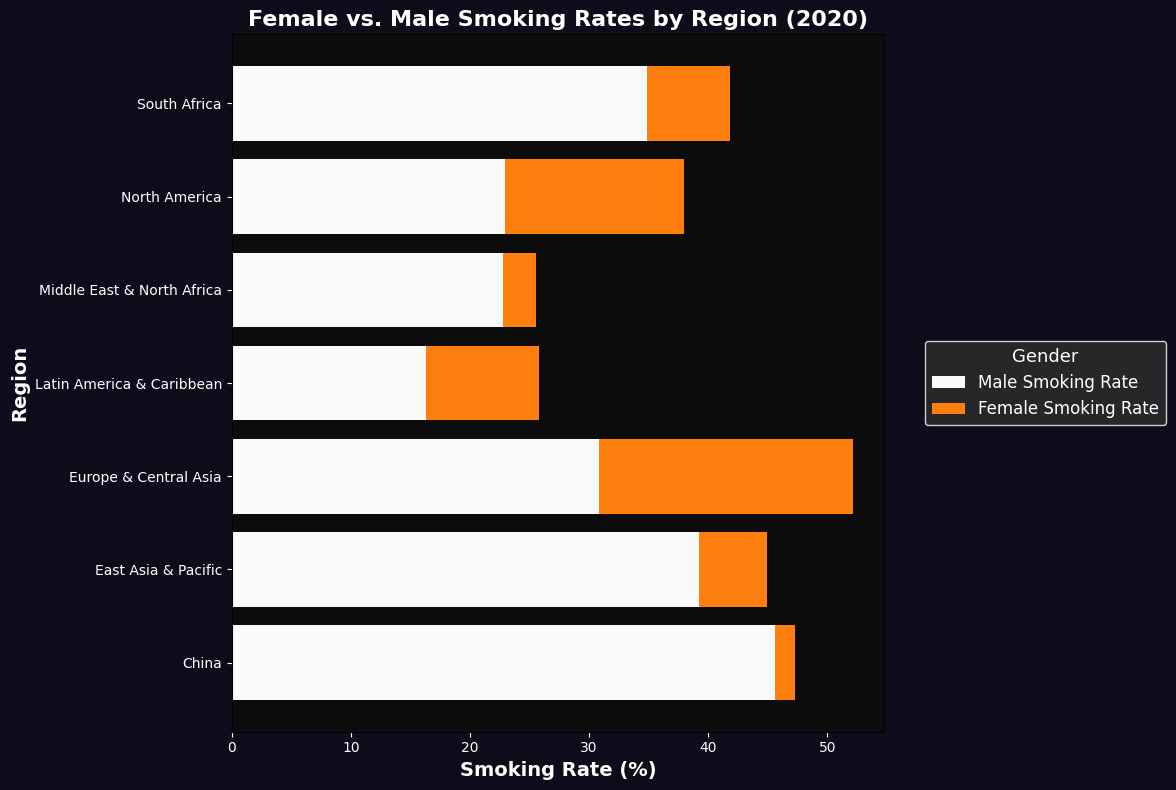

In [172]:
# Prepare the data for the table
fig1_df = habits_vs_education_df[['Male smoking rate in 2020(%)', 'Female smoking rate in 2020(%)']]
fig1_df.index = habits_vs_education_df.index  # Ensure Region is set as the index
fig1_df = fig1_df.rename(columns={
    'Male smoking rate in 2020(%)': 'Male Smoking Rate (%)',
    'Female smoking rate in 2020(%)': 'Female Smoking Rate (%)'
})

# Create a horizontal bar chart for Female smoking rate over Male smoking rate
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Male smoking rate bars
male_bars = ax.barh(fig1_df.index, fig1_df['Male Smoking Rate (%)'], color='#fafafa', label='Male Smoking Rate')

# Plot Female smoking rate bars over Male smoking rate
female_bars = ax.barh(fig1_df.index, fig1_df['Female Smoking Rate (%)'], 
                      left=fig1_df['Male Smoking Rate (%)'], color='#ff7f0e', label='Female Smoking Rate')

# Customize the chart
ax.set_title('Female vs. Male Smoking Rates by Region (2020)', fontsize=16, weight='bold', color='white')
ax.set_xlabel('Smoking Rate (%)', fontsize=14, weight='bold', color='white')
ax.set_ylabel('Region', fontsize=14, weight='bold', color='white')
ax.set_facecolor('#0c0c0c')  # Inner chart background color
fig.patch.set_facecolor('#0c0c1b')  # Outer background color
ax.tick_params(colors='white')  # Set tick label color to white

# Add legend to the right of the chart with customized font color and background
legend = ax.legend(title='Gender', fontsize=12, title_fontsize=13, loc='center left', 
                   bbox_to_anchor=(1.05, 0.5), frameon=True)  # Enable legend frame

# Customize legend background and font colors
legend.get_frame().set_facecolor('#2f2f2f')  # Set background color
legend.get_frame().set_edgecolor('white')    # Set edge color (optional)
legend.get_frame().set_linewidth(1)          # Adjust frame thickness
legend.get_title().set_color('white')        # Set title font color
for text in legend.get_texts():
    text.set_color('white')  # Set label font color

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the chart
plt.show()

## Habbits rates between the Regions:

Using the Smoking, Gamers and Coffee data we will normalize them in order for the highest value in each column to be one and in this way scale up each value.

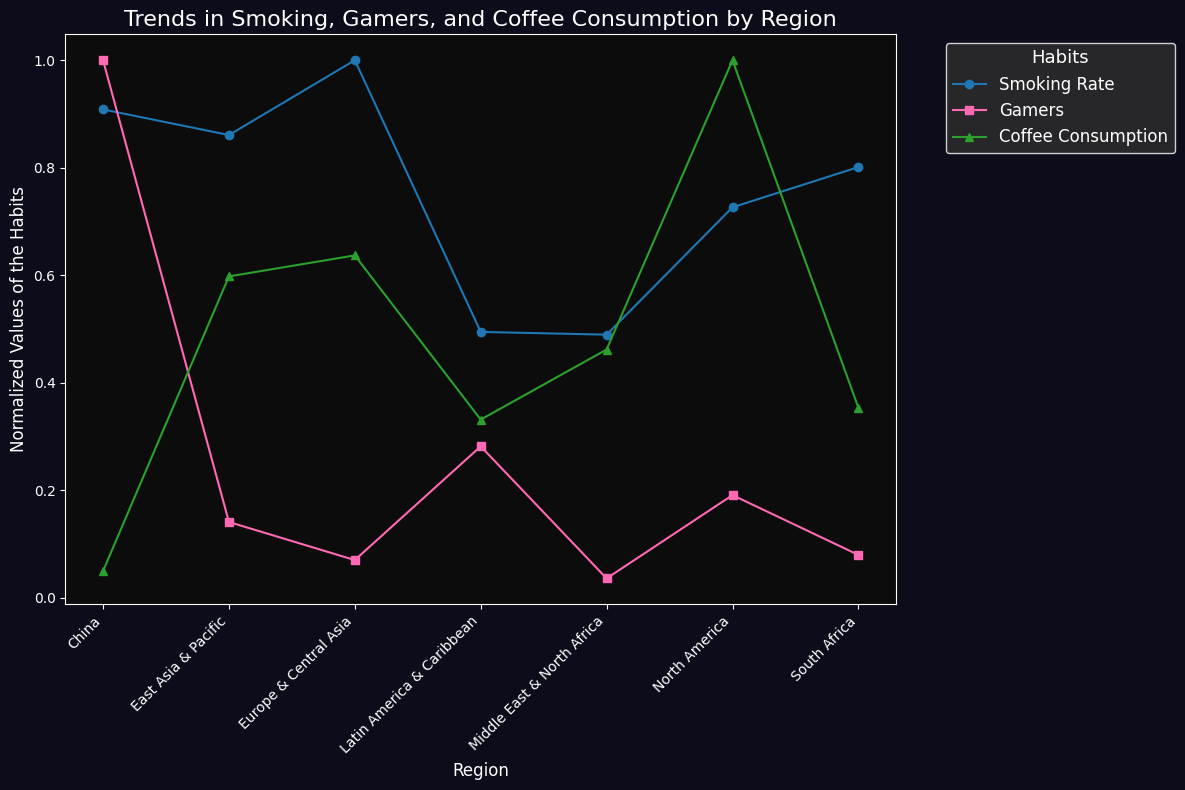

In [173]:
# Normalize data for comparison
normalized_smoking = habits_vs_education_df['Smoking rate in 2020(%)'] / habits_vs_education_df['Smoking rate in 2020(%)'].max()
normalized_gamers = habits_vs_education_df['Gamers in 2019(MM)'] / habits_vs_education_df['Gamers in 2019(MM)'].max()
normalized_coffee = habits_vs_education_df['Coffee per capita in 2020 (KG)'] / habits_vs_education_df['Coffee per capita in 2020 (KG)'].max()

# Plot multi-line chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the lines
ax.plot(habits_vs_education_df.index, normalized_smoking, label='Smoking Rate', marker='o', color='#1f77b4')
ax.plot(habits_vs_education_df.index, normalized_gamers, label='Gamers', marker='s', color='#ff69b4')
ax.plot(habits_vs_education_df.index, normalized_coffee, label='Coffee Consumption', marker='^', color='#2ca02c')

# Customize chart
ax.set_xlabel('Region', fontsize=12, color='white')  # Font color for x-axis
ax.set_ylabel('Normalized Values of the Habits', fontsize=12, color='white')  # Font color for y-axis
ax.set_title('Trends in Smoking, Gamers, and Coffee Consumption by Region', fontsize=16, color='white')  # Font color for title
ax.set_xticks(range(len(habits_vs_education_df.index)))
ax.set_xticklabels(habits_vs_education_df.index, rotation=45, ha='right', color='white')  # Font color for xticklabels

# Set background color (both inner and outer)
ax.set_facecolor('#0c0c0c')  # Inner background color
fig.patch.set_facecolor('#0c0c1b')  # Outer background color
ax.tick_params(colors='white')  # Set tick label color to white

# Set the color of the axis lines (spines) to white
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

# Move legend to the right of the plot
legend = ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Habits', fontsize=12, title_fontsize=13, frameon=True)

# Customize legend background and font colors
legend.get_frame().set_facecolor('#2f2f2f')  # Set background color for legend box
legend.get_frame().set_edgecolor('white')    # Set edge color for the legend box
legend.get_frame().set_linewidth(1)          # Set line width for the legend box
legend.get_title().set_color('white')        # Set legend title font color
for text in legend.get_texts():
    text.set_color('white')  # Set legend labels font color

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

## Habits by region Vs Students by region.

For our last plot we will simply normalize data one more time but this time with different scalability. The main reason is that due to the challenge of different proyected data we have (Rate, Millions and KG) we will have to normalize it all to be able of contrasting the consumption per region.

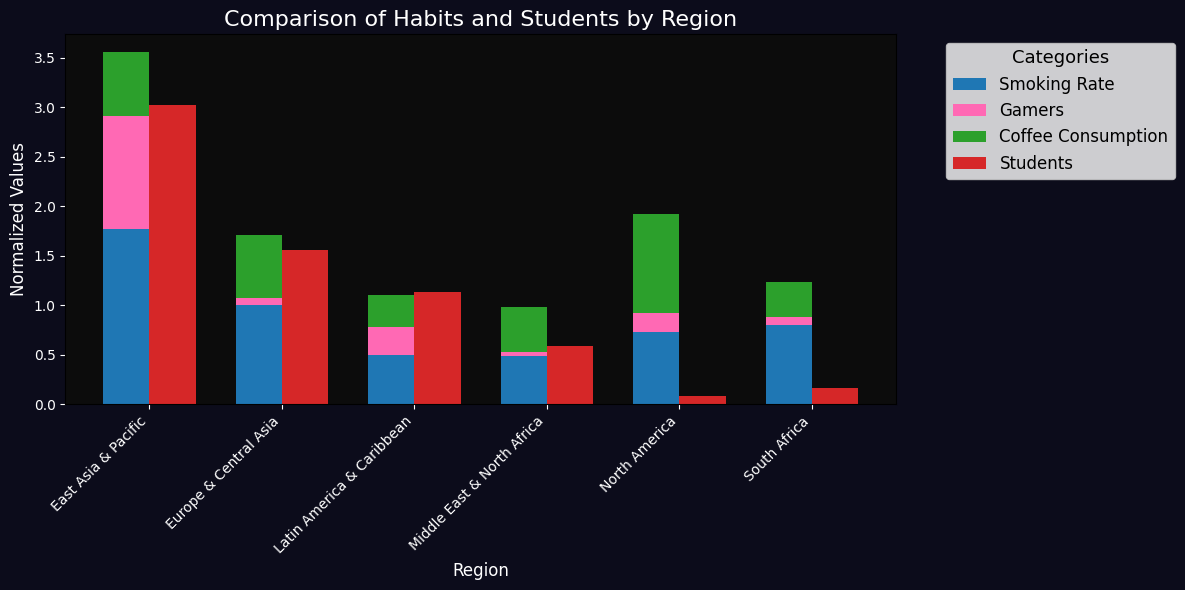

In [174]:
# Normalize the specified columns to a range from 0 to 1 (for habits data)
normalized_smoking = habits_vs_education_df['Smoking rate in 2020(%)'] / habits_vs_education_df['Smoking rate in 2020(%)'].max()
normalized_gamers = habits_vs_education_df['Gamers in 2019(MM)'] / habits_vs_education_df['Gamers in 2019(MM)'].max()
normalized_coffee = habits_vs_education_df['Coffee per capita in 2020 (KG)'] / habits_vs_education_df['Coffee per capita in 2020 (KG)'].max()

# Normalize 'Students in 2019-20' to a range from 0 to 3
normalized_students = habits_vs_education_df['Students in 2019-20'] / habits_vs_education_df['Students in 2019-20'].max() * 3

# Create the new DataFrame fig3_df with the normalized values
fig3_df = pd.DataFrame({
    'Normalized Smoking Rate': normalized_smoking,
    'Normalized Gamers': normalized_gamers,
    'Normalized Coffee Consumption': normalized_coffee,
    'Normalized Students': normalized_students
})

# Merge 'China' with 'East Asia & Pacific' by adding their values
fig3_df.loc['East Asia & Pacific'] = fig3_df.loc['China'] + fig3_df.loc['East Asia & Pacific']
fig3_df = fig3_df.drop('China', axis=0)

# Create the positions for the bars (the x-axis for the bars)
x = np.arange(len(fig3_df))  # Positions for the bars
width = 0.35  # Width of the bars

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each of the habits on top of each other
ax.bar(x, fig3_df['Normalized Smoking Rate'], width, label='Smoking Rate', color='#1f77b4')
ax.bar(x, fig3_df['Normalized Gamers'], width, bottom=fig3_df['Normalized Smoking Rate'], label='Gamers', color='#ff69b4')
ax.bar(x, fig3_df['Normalized Coffee Consumption'], width, bottom=fig3_df['Normalized Smoking Rate'] + fig3_df['Normalized Gamers'], label='Coffee Consumption', color='#2ca02c')

# Plot the normalized students next to the stacked habits bar
ax.bar(x + width, fig3_df['Normalized Students'], width, label='Students', color='#d62728')

# Customize chart
ax.set_xlabel('Region', fontsize=12, color='white')
ax.set_ylabel('Normalized Values', fontsize=12, color='white')
ax.set_title('Comparison of Habits and Students by Region', fontsize=16, color='white')
ax.set_xticks(x + width / 2)  # Position the labels between bars
ax.set_xticklabels(fig3_df.index, rotation=45, ha='right', color='white')
ax.tick_params(axis='x', colors='white')  # Set the x-axis tick color to white
ax.tick_params(axis='y', colors='white')  # Set the y-axis tick color to white

# Set background color
ax.set_facecolor('#0c0c0c')  # Inner background color
fig.patch.set_facecolor('#0c0c1b')  # Outer background color

# Add a legend to the right of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Categories', fontsize=12, title_fontsize=13)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()
